## Objective 

Predict the final sales price of each house.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the dataset
data_house = pd.read_csv(r'C:\Users\aryav\Desktop\Kaggle Competitions\House Prediction\train.csv')

In [3]:
# Brief view of the data set
data_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:

data_house.shape

(1460, 81)

The data contains 81 columns and 1460 rows

In [5]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# We can see there are lot of variables with missing values
# Let us see which of the variables have more than or equal to 30% missing values
drop_values = []

for i in data_house.columns:
    missing_perc = data_house[i].isna().sum()/data_house.shape[0]
    if missing_perc >= 0.30:
        drop_values.append(i)

drop_values
        

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
## Let's see how many missing values are in each of the above columns

for i in drop_values:
    print('Percentage of missing values for the column '+ i, ':', data_house[i].isna().sum()/data_house.shape[0])

Percentage of missing values for the column Alley : 0.9376712328767123
Percentage of missing values for the column FireplaceQu : 0.4726027397260274
Percentage of missing values for the column PoolQC : 0.9952054794520548
Percentage of missing values for the column Fence : 0.8075342465753425
Percentage of missing values for the column MiscFeature : 0.963013698630137


As seen above all the columns in drop_values list have very high percentage of missing values. Let us drop them from the dataset.

In [8]:
data_house.drop(columns = drop_values, inplace = True)

In [9]:
print(f"Train data has {data_house.duplicated().sum()} duplicated data")
    

Train data has 0 duplicated data


In [10]:
# Let us drop the Id column because that will not contribute at all as predictor variable
data_house.drop(columns = ['Id'], inplace = True)

### Analysis of Numerical Variables

Let us analyze the sales price. 

In [11]:

data_house.SalePrice.describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

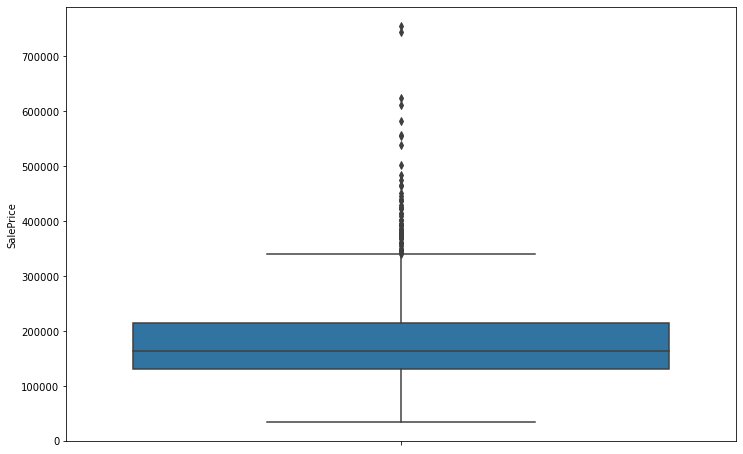

In [12]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data_house, y = 'SalePrice')
plt.show()

Observation :

There are few houses who have very high sales price greater than USD 500K

75% of the houses have sales price less than or equal to USD 214K


#### Let us look at the distribution of the Sales Price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

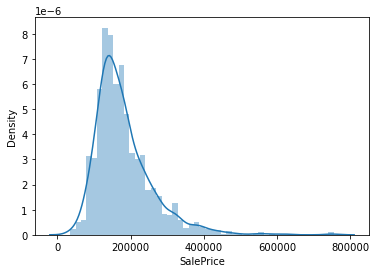

In [13]:
sns.distplot(data_house.SalePrice)

The SalePrice data is not normally distributed.

It is positively skewed with houses having sales price as high as USD 755K

### Distribution of all the numerical variable

Histogram for all the numerical variables

In [14]:
data_num = data_house.select_dtypes(include = ['float64', 'int64'])
#data_num.drop(columns = ['SalePrice'], inplace = True)
data_num.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


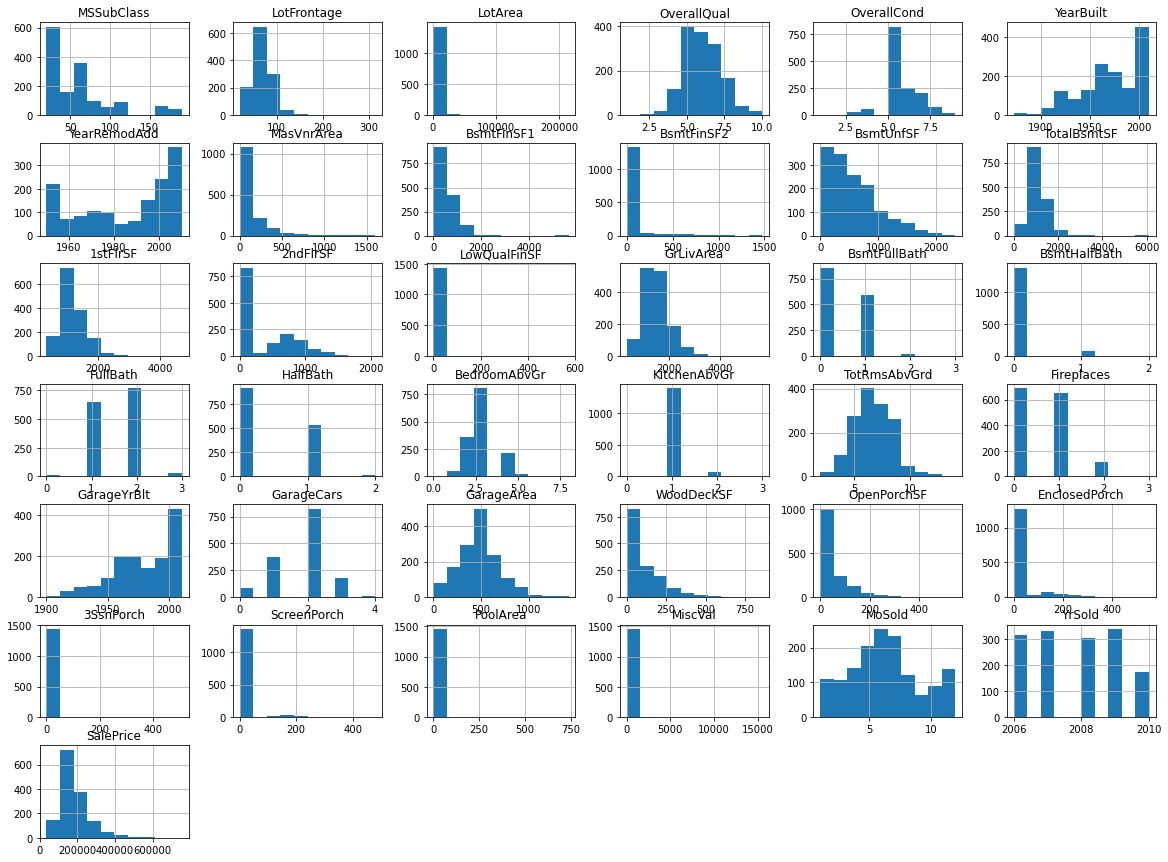

In [16]:
data_num.hist(figsize = (20,15))
plt.show()

Most of the numerical variables are tail heavy, they extend much farther to the right . 

The are variables that are negatively skewed- YearBuilt, YearRemodelAdd and GarageYrBuilt suggesting that there are some houses that are very old. This might impact SalePrice , houses that are very old should have less SalePrice.



#### Let us explore the relationship between SalePrice and other numerical variables. We will identify which of the variables have large influence on the SalePrice by selecting only those variables which have correlation of 0.5 or more.

In [17]:
# corr_sales contain the relationship of numerical variables only with the SalePrice
# We are removing the SalePRice because correlation of variable with itself is always 1
corr_sales = data_num.corr()['SalePrice'][:-1]

In [18]:
corr_sales.sort_values(ascending = False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [19]:
imp_features = corr_sales[abs(corr_sales)>0.5].sort_values(ascending = False)
print('There are {} strongly correlated variables with SalePrice:\n{}'.format(len(imp_features),imp_features))

There are 10 strongly correlated variables with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


#### Let's explore a bit more by plotting scatter plot for  numerical variables that seem most correlated with SalePrice

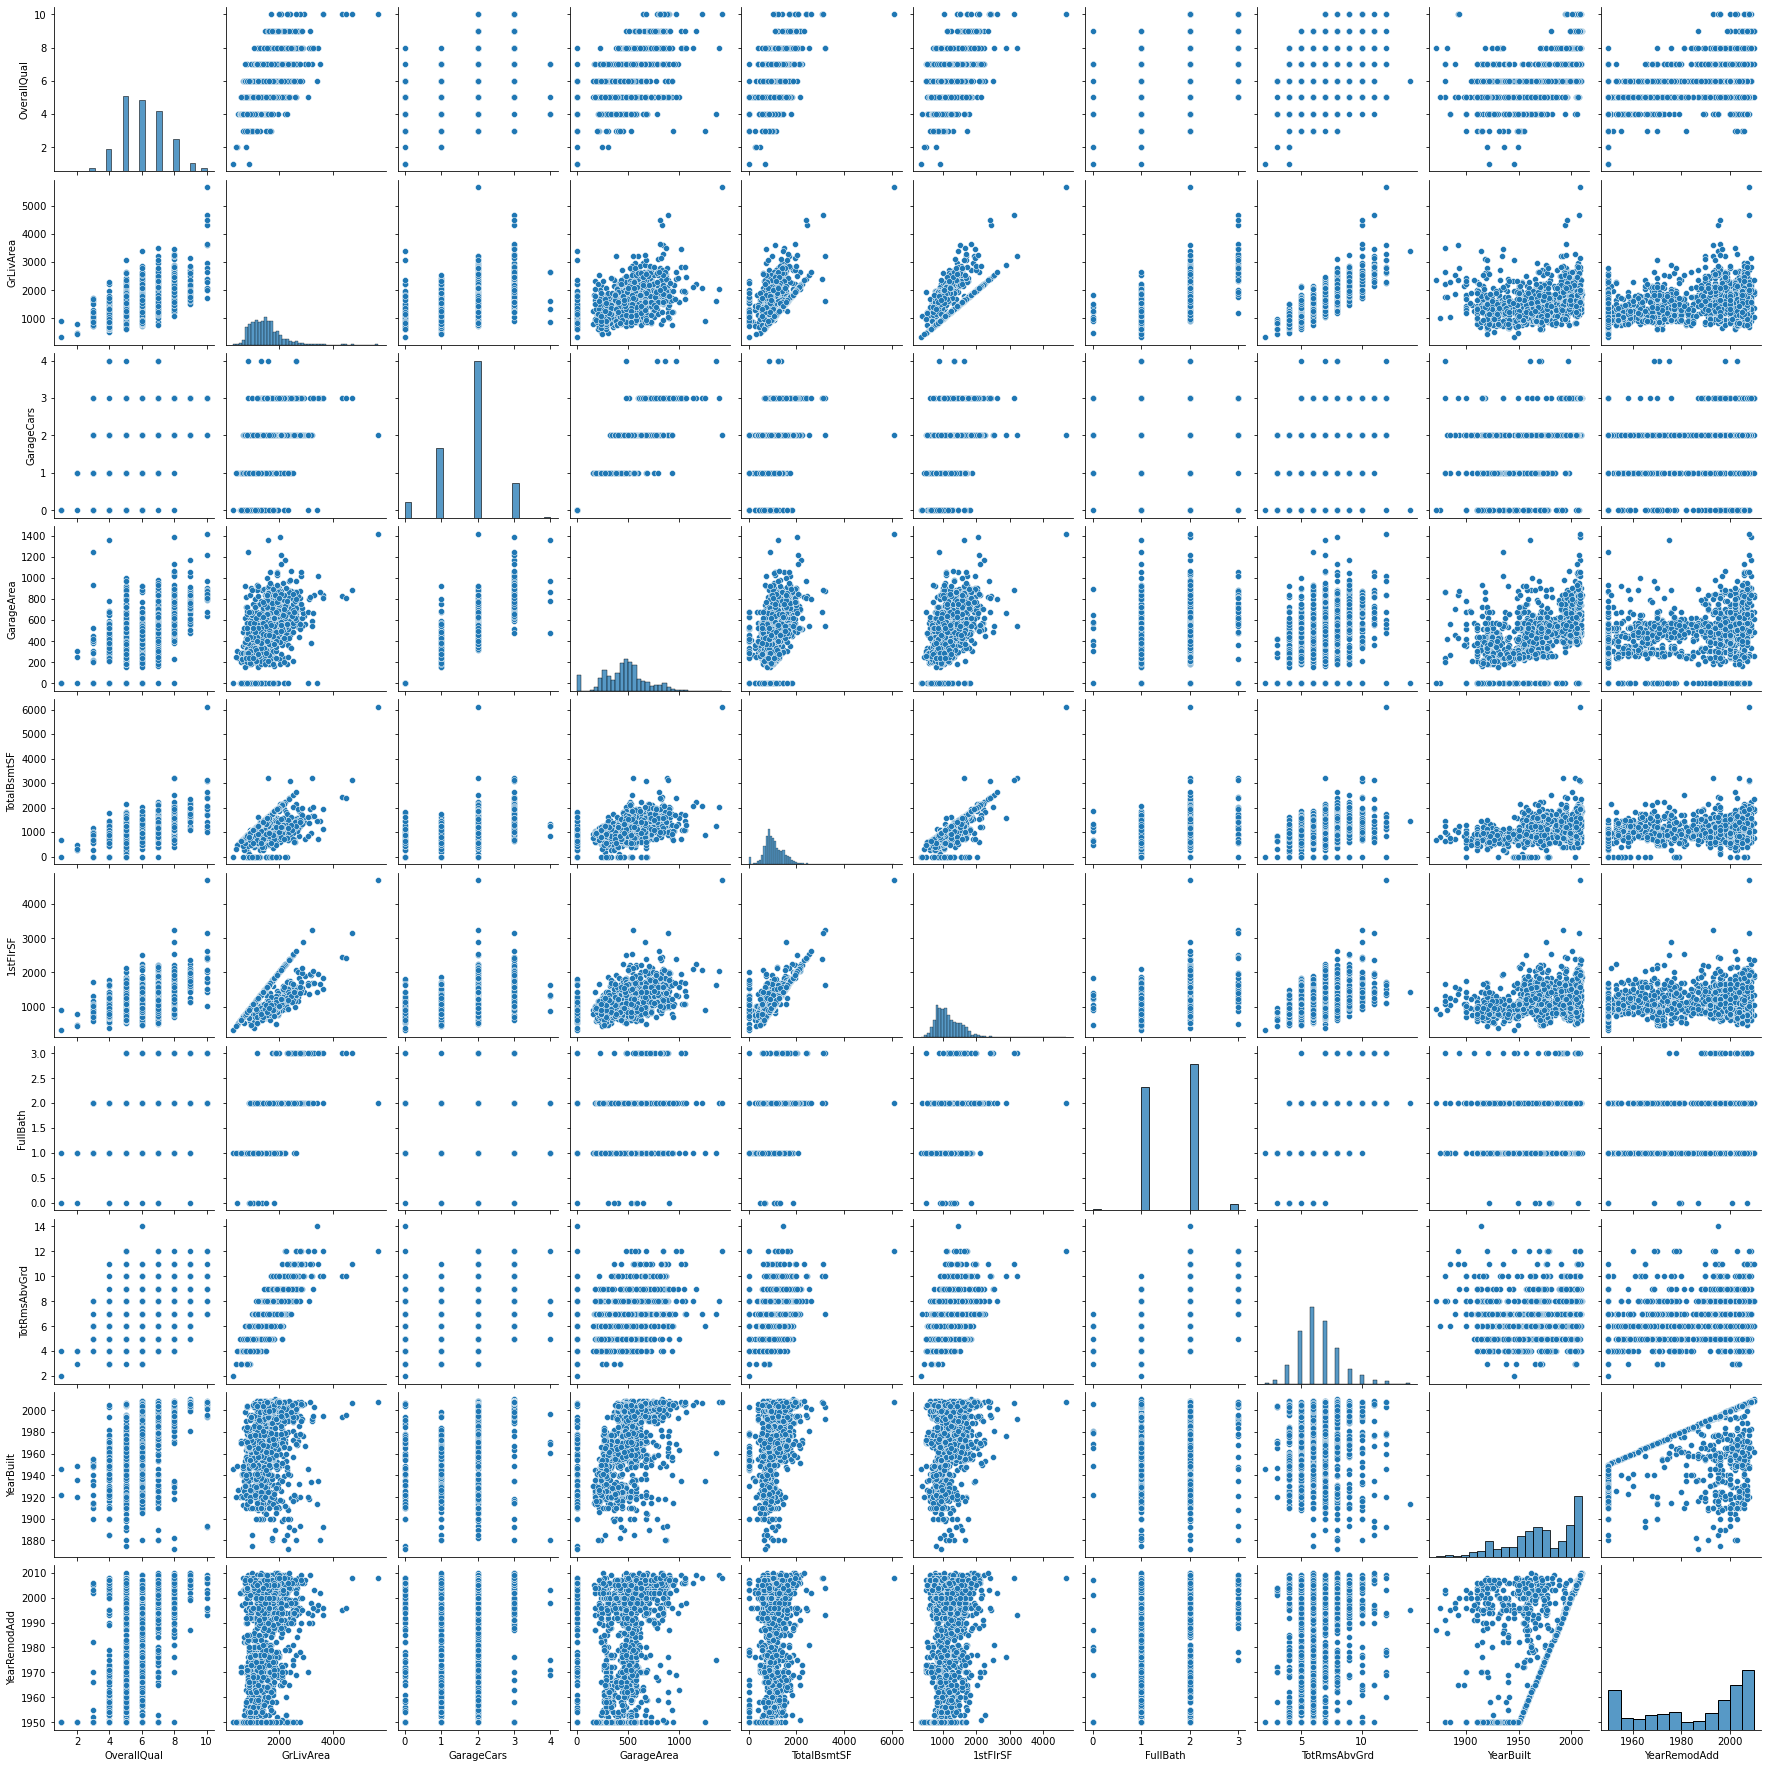

In [20]:
sns.pairplot(data_num[imp_features.index], size = 2.5)

Observations:

Above Ground Living Area has linear relationship  with TotalBsmtSF. We can see some kind of border in the scatter plot between these two variables. This shows that as the ground living area increases so does the basement square feet.There are houses that have above ground living area greater than the basement area as seen in the scatter plot.

TotalBsmtSF has linear relationship  with 1stFlrSF and there are houses that have 1st floor square feet area greater than the total basement area as seen in the scatter plot.

#### Let's explore the relationship between YearBuilt and Sale Price. The reason being houses that have been recently built might be more expensive.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

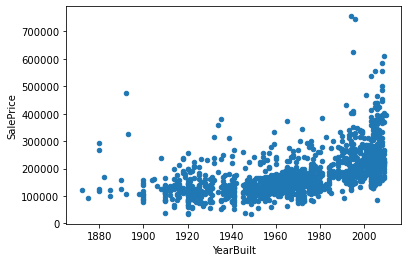

In [21]:
data_sales_yr = pd.concat([data_house.YearBuilt, data_house.SalePrice], axis = 1)
data_sales_yr.plot.scatter(x = 'YearBuilt', y = 'SalePrice')

Observation:

Houses that were built recently that is year 2000 comparatively have higher sale price.

## Analyze the Factor/Categorical Variables

#### Let's see the distribution of Sale Price with categorical variables.

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

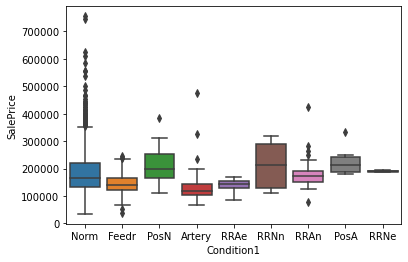

In [22]:
sns.boxplot(data = data_house, x = 'Condition1', y = 'SalePrice')

Observation:

The distribution of SalePrice is large for all those houses whose condition has been described 'Normal'. It has many outliers too. 

Houses with condition 'PosN'(Near positive off-site feature--park, greenbelt, etc.) and 'RRNn'(Within 200' of North-South Railroad) have high mean Sale Price.

Houses that are adjacent to feeder street have low sale price.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

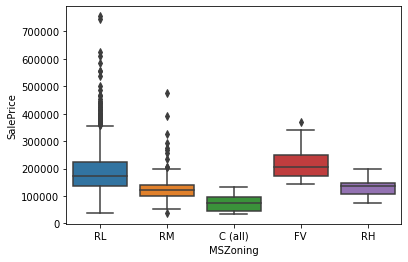

In [23]:
sns.boxplot(data = data_house, x = 'MSZoning', y = 'SalePrice')

Observation:

The SalePrice is high for the houses that have zoning classification as Floating Village.

The boxplot under RL that is Residential Low Density has large distribution indicating SalePrice vary a lot.

Houses under 'Commercial' and 'Residential Medium Density' zoning do not have high SalePrice

ALso we see there are no values for the zones - 'A', 'I' and 'RP'. If the data outside of the training data contains the values for these zones there are chances that regression model might make absurd predictions

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

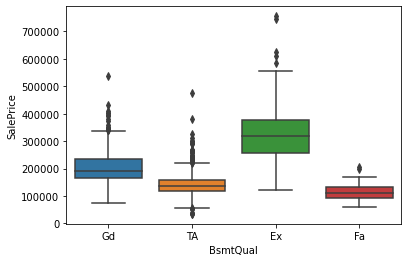

In [24]:
sns.boxplot(data = data_house, x = 'BsmtQual', y = 'SalePrice')

Observation:

None of the houses have 'Poor' or 'No Basement' classification.

Houses with 'Excellent' classification are fetching higher SalePrice.

Houses with 'Typical' classification have low SalePrice. 

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

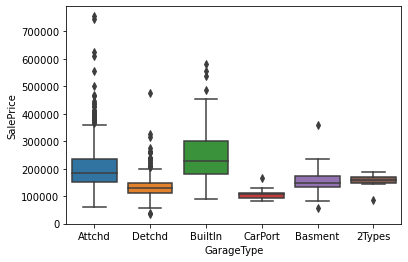

In [25]:
sns.boxplot(data = data_house, x = 'GarageType', y = 'SalePrice')

Observations:

The SalePrice vary a lot under 'Attached' Garage Type

Houses with 'Detached' Garage type have lower Sale Price.

Houses with 'BuiltIn' Garage Type have high sale price.
    

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

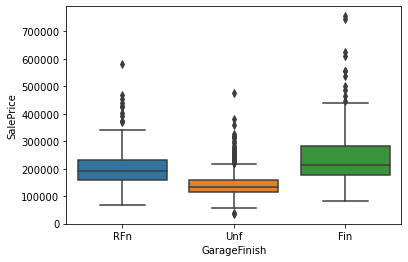

In [26]:
sns.boxplot(data = data_house, x = 'GarageFinish', y = 'SalePrice')

Observation:

Houses that have 'Finished' garage have large distribution suggesting SalePrice varies a lot. The mean SalePrice is high for 'Finished' Garage Type.

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

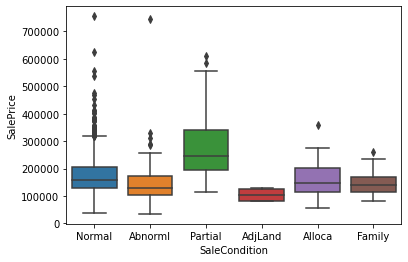

In [27]:
sns.boxplot(data = data_house, x = 'SaleCondition', y = 'SalePrice')

Observation:

Houses with 'Partial' sale condition have high SalePrice. Since these are associated with new homes they will have high price.
    

In [28]:
#fig, axes = plt.subplots(round(len(data_cat) / 3), 3, figsize=(12, 30))

#for i, ax in enumerate(fig.axes):
    #if i < len(data_cat):
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        #sns.countplot(x=data_house[i], alpha=0.7, data=data_house, ax=ax)

#fig.tight_layout()

Observation:

Majority of categorical variables have the distribution where one category has majority of data.

### Treat Missing Values

In [29]:
missing_values = [i for i in data_house.columns if data_house[i].isna().sum() != 0]
missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [30]:
data_house[missing_values].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [31]:
data_house[data_house.LotFrontage.isna()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,154000


In [32]:
data_house.groupby('LotConfig').LotFrontage.median()

LotConfig
Corner     80.0
CulDSac    50.0
FR2        64.0
FR3        59.5
Inside     68.0
Name: LotFrontage, dtype: float64

In [33]:
data_house['LotFrontage'] = data_house['LotFrontage'].fillna(data_house.groupby('LotConfig').LotFrontage.transform('median'))

In [34]:
data_house['LotFrontage'].isna().sum()

0

In [35]:
#For features with small percentage of missing values (less than 1%), we will simply drop those rows.
data_house = data_house.dropna(axis=0,subset=['MasVnrArea','MasVnrType','Electrical'])

Let us explore variables related to basement in detail. We will see if all the values in the basement related columns have null values or zero where BsmntQual is missing. This will suggest that either houses do not have any basement or there is no information at all. In either case we will then categorize the missing values as NA

In [36]:
data_house[data_house.BsmtQual.isnull()][['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF']]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0


Observation:

The above data suggests that there is no basment or no information for basement related missing values

In [37]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [38]:
# Basement String Columns --> fillna 'NA'
bsmt_str = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
data_house[bsmt_str] = data_house[bsmt_str].fillna('NA')

Let us explore variables related to garage in detail. We will see if all the values in the garage related columns have null values or zero where GarageType is missing. This will suggest that either houses do not have any garage or there is no information at all. In either case we will then categorize the missing values as NA

In [39]:
data_house[data_house.GarageType.isnull()][['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea','GarageYrBlt' ]]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea,GarageYrBlt
39,NaN,NaN,NaN,NaN,0,0,NaN
48,NaN,NaN,NaN,NaN,0,0,NaN
78,NaN,NaN,NaN,NaN,0,0,NaN
88,NaN,NaN,NaN,NaN,0,0,NaN
89,NaN,NaN,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,0,0,NaN
1407,NaN,NaN,NaN,NaN,0,0,NaN
1449,NaN,NaN,NaN,NaN,0,0,NaN
1450,NaN,NaN,NaN,NaN,0,0,NaN


Observation:

The above data suggests that there is no garage or no information for garage related missing values

In [40]:
garage_str = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea' ]

data_house[garage_str] = data_house[garage_str].fillna('NA')

In [41]:
# We need to be careful with GarageYrBlt.
# This column represents the year garage was built. Hence, setting missing values equal to 0 can be misleading. 
data_house['GarageYrBlt'] = data_house['GarageYrBlt'].fillna(np.round(data_house['GarageYrBlt'].mean(),0))

In [42]:
data_house['GarageYrBlt'].isna().sum()

0

#### Building  Train and Test data on which we can fit the models

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Create dummy features so that categorical columns can be interpreted as numerical columns
data_house = pd.get_dummies(data_house, columns = data_house.select_dtypes(include = 'object').columns)

In [45]:
data_house.shape

(1451, 280)

In [46]:
X = data_house.drop('SalePrice', axis = 1 )

In [47]:
import statsmodels.api as sm
# To use OLS regression adding constant is necessary
X = sm.add_constant(X)

In [48]:
X.head()

,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1.0,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,1.0,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,1.0,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,1.0,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [49]:
y = data_house['SalePrice']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

In [51]:
#from sklearn.preprocessing import StandardScaler

In [52]:
#stdsclr = StandardScaler()
#scaled_X_train = stdsclr.fit_transform(X_train)
#scaled_X_test = stdsclr.fit_transform(X_test)


#### Multiple  Linear Regression Model

Implementing the full multiple linear regression model that is taking into account all the predictor variables.

In [53]:
from sklearn.linear_model import LinearRegression


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [84]:
# Let's add the intercept to the data
olsmod = sm.OLS(y_train,X_train)
fitted_full_model = olsmod.fit()

In [85]:
# let's print the regression summary
print(fitted_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     58.96
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:16:50   Log-Likelihood:                -11449.
No. Observations:                1015   AIC:                         2.335e+04
Df Residuals:                     787   BIC:                         2.448e+04
Df Model:                         227                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.146e+

#### Check the distribution of residuals

Multiple linear regression assumes that the residuals are normally distributed

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our residuals are normally distributed, we can use a Normal Q-Q plot to check that assumption.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

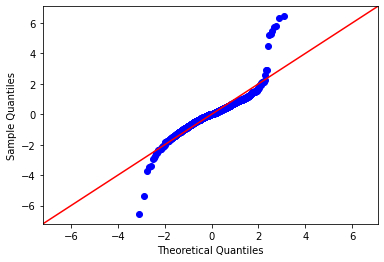

In [86]:
## Check the distribution of residuals
res = fitted_full_model.resid
fig = sm.qqplot(res, fit = True, line = '45' )

Observation:

The above qq plot suggests that the residuals have extreme values/outliers.

#### Homoscedasticity of residuals

Multiple linear regression assumes that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

Text(0, 0.5, 'Residual')

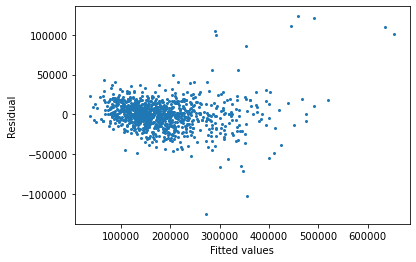

In [87]:
pred_y = fitted_full_model.predict(X_train)
fig = plt.scatter(pred_y, res, s =4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

### Calculating the Root Mean Squared Error of the full linear regression model

In [129]:
# predict values for test data
pred_full = fitted_full_model.predict(X_test)
# Calculate the mean squared error
MSE_full = mean_squared_error(y_test, pred_full)
                             
RMSE_full = np.sqrt(MSE)

print('The Root Mean Squared Error is :', RMSE_full)

The Root Mean Squared Error is : 33440.79195380023


### Feature Selection

#### Best Subset Linear Regression

Best subsets regression is also known as “all possible regressions” and “all possible models.” Again, the name of the procedure indicates how it works. Unlike stepwise, best subsets regression fits all possible models based on the independent variables that you specify.

Best subsets regression fits 2^P models, where P is the number of predictors in the dataset.If you have 10 independent variables, it fits 1024 models. However, if you have 20 variables, it fits 1,048,576 models!



#### Stepwise Regression

As the name stepwise regression suggests, this procedure selects variables in a step-by-step manner. The procedure adds or removes independent variables one at a time using the variable’s statistical significance. Stepwise either adds the most significant variable or removes the least significant variable. It does not consider all possible models, and it produces a single regression model when the algorithm ends.

You can control the specifics of stepwise procedure.You can specify whether it can only add variables, only remove variables, or both. You can also set the significance level for including and excluding the independent variables.


#### Using AIC for backward and forward stepwise regression

The AIC is designed to find the model that explains the most variation in the data, while penalizing for models that use an excessive number of parameters.

Once you’ve fit several regression models, you can compare the AIC value of each model. The model with the lowest AIC offers the best fit.

### Implementing the Subset Model

In [60]:
import itertools

We can perform best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using AIC. We'll define a helper function to outputs the best set of variables for each model size.

In [61]:
# Build the function to return AIC score of the model

def processSubset(X,y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    reg = model.fit()
    AIC = reg.aic
    return {'model':reg, 'AIC':AIC}

In [62]:
def getBest(X,y,k):
    results = []
    # Take all the possible combinations of predictor variables
    # Suppose k = 2, itertools.combinations will take all possible combinations of 2 variables
    
    for combo in itertools.combinations(X.columns.difference(['const']),k):
        combo = (list(combo)+['const'])
        
        # result will store model with each of the combinations and their respective AIC
        
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    
    # Wrap everything in nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the best AIC score
    best_model = models.loc[models['AIC'].argmin()]
    print('Processed', models.shape[0], 'models on', k)
    
    
    
    return best_model

The above function returns a DataFrame containing the best model that we generated, along with some extra information about the model. Now we want to call the above function for each number of predictors k.

In [63]:
models_best = pd.DataFrame(columns=["AIC", "model"])


for i in range(1,3):
    models_best.loc[i] = getBest(X_train, y_train, i)


Processed 279 models on 1
Processed 38781 models on 2


Now we have one big DataFrame that contains the best models we've generated along with their AIC. We can get a full rundown of a model using the summary() function:

In [65]:
print(models_best.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1233.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          5.81e-272
Time:                        15:09:13   Log-Likelihood:                -12289.
No. Observations:                1015   AIC:                         2.458e+04
Df Residuals:                    1012   BIC:                         2.460e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      58.3143      3.266     17.858      

Observation:

From the above summary the two most important variables for predicting house price is 'GrLivArea' and 'OverallQual'.

To save time, we only generated results up to the best 2-variable model. You can use the functions we defined above to explore as many variables as are desired.

### Calculating the Root Mean Squared Error of the Subset Model

In [102]:
best_model_all = models_best.loc[2]
subset_predictors = best_model_all['model'].model.exog_names

In [104]:
pred_subset = best_model_all['model'].predict(X_test[subset_predictors])
MSE_subset = mean_squared_error(y_test,pred_subset)
RMSE_subset = np.sqrt(MSE_subset)
print('The Root Mean Square of subset model is :', RMSE_subset)

The Root Mean Square of subset model is : 38930.510695839606


### Forward and Backward Step Selection

#### Forward Step Selection

Start with the constant model and successively add variables

In [67]:
def forward (X,y, predictors):
    # Initialize the list. The list will store model and its AIC score
    results = []
    
    # Since we are successively adding predictors, pull out the predictors we still need to process
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(X,y, feature_set = predictors+[p]+['const']))
    
    #Wrap everything up in the dataframe
    models = pd.DataFrame(results)
    
    # Best model is the one that has the lowest AIC score
    best_model = models.loc[models['AIC'].argmin()]
    
    
    # print the independent variables and the AIC score of the model with the minimum AIC score    
    print('Selected predictors :', best_model['model'].model.exog_names, 'AIC :', best_model[0])
    
    return best_model

#### Define the function to perform the forward selection

In [68]:
def forward_model(X,y):
    
    # Assign the dataframe to store the AIC score and the model
    Forward_model = pd.DataFrame(columns = ['AIC' , 'model'])
    
    # Initialize the list predictors. 
    predictors = []
    
    # Forward selection starts with an empty model and we will add variables one by one.    
    for i in range(1, len(X.columns.difference(['const']))+1):
        
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        
        if i > 1:
            # We will stop adding variables once the AIC score is greater than the previous one.
            if Forward_result.AIC > forward_model_before:            
              break
        
        Forward_model.loc[i] = Forward_result
        predictors = Forward_model.loc[i]['model'].model.exog_names
        forward_model_before = Forward_model.loc[i]['AIC']
        predictors = [ k for k in predictors if k != 'const']
        
    return Forward_model
        


In [69]:
model_fwd = forward_model(X = X_train, y = y_train)

Selected predictors : ['OverallQual', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240151587C0>
Selected predictors : ['OverallQual', 'GrLivArea', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002401554CDF0>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240A0FC6100>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240140B0820>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240155C2D90>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'const'] AI

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002401400BD60>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240155631C0>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvG

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002409654

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BsmtFinSF2', 'BsmtExposure

#### We will keep the model with the lowest AIC score because we are using AIC to quantify the best model

In [70]:
best_model_fwd = model_fwd.loc[model_fwd['AIC'].argmin()]

In [71]:
best_model_fwd.AIC

23178.092704585095

In [72]:
len(best_model_fwd['model'].model.exog_names)

102

In [73]:
best_model_fwd['model'].model.exog_names

['OverallQual',
 'GrLivArea',
 'BsmtQual_Ex',
 'RoofMatl_ClyTile',
 'BsmtFinSF1',
 'YearBuilt',
 'MSSubClass',
 'ExterQual_Ex',
 'BsmtExposure_No',
 'BedroomAbvGr',
 'OverallCond',
 'TotalBsmtSF',
 'KitchenQual_Ex',
 'Neighborhood_NoRidge',
 'SaleType_New',
 'LotArea',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr',
 'RoofMatl_WdShngl',
 'Functional_Typ',
 'PoolArea',
 'BsmtExposure_Gd',
 'Neighborhood_NridgHt',
 'MSZoning_FV',
 'GarageCars',
 'BldgType_Duplex',
 'Exterior1st_BrkFace',
 'LandSlope_Sev',
 'Condition1_Norm',
 'HeatingQC_Ex',
 'Neighborhood_BrkSide',
 'SaleCondition_Abnorml',
 'MasVnrType_Stone',
 'Functional_Sev',
 'GarageQual_Ex',
 'GarageCond_NA',
 'LowQualFinSF',
 'Neighborhood_Mitchel',
 'GarageCond_Ex',
 'MasVnrArea',
 'MasVnrType_None',
 'Heating_OthW',
 'Neighborhood_Edwards',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'ExterCond_Fa',
 'SaleCondition_Partial',
 'SaleType_ConLD',
 'ExterCond_Gd',
 'SaleType_Con',
 'Condition2_PosA',
 'Foundation_PConc',
 'RoofStyle_Gable

Observation:

The best forward selection model has the AIC score of 23178.092 and it has 102 variables   
    

#### We can get a full rundown of the model using the summary() function:

In [108]:
best_model_fwd['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     157.5
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:41:15   Log-Likelihood:                -11498.
No. Observations:                1015   AIC:                         2.318e+04
Df Residuals:                     924   BIC:                         2.363e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OverallQual            5220.6804    978.014      5.338      0.000    3301.294    7140.067
GrLivArea                26.2957      4.868      5.402      0.000      16.742      35.849
BsmtQual_Ex             1.85e+04   3542.596      5.221      0.000    1.15e+04    2.54e+04
RoofMatl_ClyTile      -7.593e+05   3.02e+04    -25.143      0.000   -8.19e+05      -7e+05
BsmtFinSF1               16.0454      2.170      7.393      0.000      11.786      20.305
YearBuilt               382.2608     48.983      7.804      0.000     286.130     478.391
MSSubClass             -155.8575     22.628     -6.888      0.000    -200.266    -111.449
ExterQual_Ex           3.064e+04   5150.886      5.949      0.000    2.05e+04    4.07e+04
BsmtExposure_No       -7473.3989   2273.285     -3.287      0.001   -1.19e+04   -3011.998
BedroomAbvGr          -5746.6633   1386.386     -4.145      0.000   -8467.494   -3025.832
OverallCond            7135.7926    778.433      9.167      0.000    5608.090    8663.495
TotalBsmtSF              26.1797      3.599      7.274      0.000      19.116      33.243
KitchenQual_Ex         2.455e+04   3905.951      6.286      0.000    1.69e+04    3.22e+04
Neighborhood_NoRidge   2.767e+04   4791.287      5.774      0.000    1.83e+04    3.71e+04
SaleType_New           5.958e+04   1.77e+04      3.374      0.001    2.49e+04    9.42e+04
LotArea                   0.6846      0.109      6.288      0.000       0.471       0.898
Neighborhood_Crawfor   2.511e+04   4115.124      6.102      0.000     1.7e+04    3.32e+04
Neighborhood_StoneBr   4.254e+04   5391.842      7.889      0.000     3.2e+04    5.31e+04
RoofMatl_WdShngl       4.848e+04   1.04e+04      4.663      0.000    2.81e+04    6.89e+04
Functional_Typ          1.37e+04   3081.902      4.444      0.000    7647.578    1.97e+04
PoolArea                128.1474     19.423      6.598      0.000      90.029     166.265
BsmtExposure_Gd        1.377e+04   3147.136      4.374      0.000    7588.802    1.99e+04
Neighborhood_NridgHt   1.488e+04   4002.472      3.718      0.000    7024.652    2.27e+04
MSZoning_FV            1.595e+04   3867.611      4.124      0.000    8360.722    2.35e+04
GarageCars             7015.3102   1581.672      4.435      0.000    3911.224    1.01e+04
BldgType_Duplex       -6005.8995   5497.741     -1.092      0.275   -1.68e+04    4783.608
Exterior1st_BrkFace    1.577e+04   3843.775      4.102      0.000    8223.866    2.33e+04
LandSlope_Sev         -3.202e+04   9790.121     -3.271      0.001   -5.12e+04   -1.28e+04
Condition1_Norm        8607.8822   2147.846      4.008      0.000    4392.661    1.28e+04
HeatingQC_Ex           3709.0155   1750.521      2.119      0.034     273.557    7144.474
Neighborhood_BrkSide   9641.1998   3801.345      2.536      0.011    2180.928    1.71e+04
SaleCondition_Abnorml -

### Calculating the Root Mean Squared Error of the Forward Model

In [115]:
forward_predictors = best_model_fwd['model'].model.exog_names

In [116]:
pred_fwd = best_model_fwd['model'].predict(X_test[forward_predictors])
MSE_fwd = mean_squared_error(y_test,pred_fwd)
RMSE_fwd = np.sqrt(MSE_fwd)
print('The Root Mean Square of forward feature selection model is :', RMSE_fwd)

The Root Mean Square of forward feature selection model is : 31617.1375990116


#### Backward Step Selection

Start with the full model and successively drop the variables that do not contribute meaningfully.

In [74]:
def backward (X,y, predictors):
    # Initialize the list. The list will store model and its AIC score
    results = []    
    
    for combo in itertools.combinations(predictors,len(predictors)-1):
        results.append(processSubset(X,y, feature_set = list(combo)+['const']))
    
    #Wrap everything up in the dataframe
    models = pd.DataFrame(results)
    
    # Best model is the one that has the lowest AIC score
    best_model = models.loc[models['AIC'].argmin()]
    
    
    # print the independent variables and the AIC score of the model with the minimum AIC score    
    print('Selected predictors :', best_model['model'].model.exog_names, 'AIC :', best_model[0])
    
    return best_model

#### Define the function to perform bakward selection

In [75]:
#models_bwd = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns.difference(['const']))))


#predictors = X.columns.difference(['const'])

#while(len(predictors) > 1):  
   # models_bwd.loc[len(predictors)-1] = backward(X_train,y_train,predictors)
    #predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names
    #predictors = [k for k in predictors if k != 'const']



#### Define the function that successively adds and drop variables to find model that lowers AIC

In [76]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    # Initialize the predictors list. 
    predictors = []
    # Initial AIC score of the model.
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        #Perform forward selection 
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        # Record the model and the respective AIC
        Stepmodels.loc[i] = Forward_result
        # Initialize the list with model's predictor variables
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        # Subsequently perform the backward selection and Check if there is anything to remove in predictors
        Backward_result = backward(X=X, y=y, predictors=predictors)  
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    return Stepmodels

In [77]:
step_models = Stepwise_model(X = X_train, y = y_train)

Selected predictors : ['OverallQual', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240330D54F0>
forward
Selected predictors : ['const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240C85B1BE0>
Selected predictors : ['OverallQual', 'GrLivArea', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024015003820>
forward
Selected predictors : ['OverallQual', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240156DCD90>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024015B7BD90>
forward
Selected predictors : ['OverallQual', 'GrLivArea', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240156E9F70>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', '

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240155C22B0>
forward
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240C8595AC0>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalB

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240156E9790>
forward
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'G

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240144C9E80>
forward
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea'

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240156BEE50>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'Kitche

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'Heating_OthW', 'Neighborhood_Edwards', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240330D5280>
Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubC

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'BldgType_Duplex', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'const'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000240C85A4700>
forward
Se

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'ExterCond_Fa', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'const'] AIC : <statsmodels.regression.linear_model.RegressionRes

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'const'] AIC : <statsm

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Foundation_PConc', 'RoofStyle_Gable', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBa

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'RoofStyle_Gable', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'Lo

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBa

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBa

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Foundation_PConc', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', 

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'Foundation_PConc', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBa

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'BsmtCon

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Heating_OthW', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'BsmtCond_NA', 'Conditio

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

Selected predictors : ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'YearBuilt', 'MSSubClass', 'ExterQual_Ex', 'BsmtExposure_No', 'BedroomAbvGr', 'OverallCond', 'TotalBsmtSF', 'KitchenQual_Ex', 'Neighborhood_NoRidge', 'SaleType_New', 'LotArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'Functional_Typ', 'PoolArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'MSZoning_FV', 'GarageCars', 'Exterior1st_BrkFace', 'LandSlope_Sev', 'Condition1_Norm', 'HeatingQC_Ex', 'Neighborhood_BrkSide', 'SaleCondition_Abnorml', 'MasVnrType_Stone', 'Functional_Sev', 'GarageQual_Ex', 'GarageCond_NA', 'LowQualFinSF', 'Neighborhood_Mitchel', 'GarageCond_Ex', 'MasVnrArea', 'MasVnrType_None', 'Neighborhood_Edwards', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SaleCondition_Partial', 'SaleType_ConLD', 'ExterCond_Gd', 'SaleType_Con', 'Condition2_PosA', 'BldgType_2fmCon', 'BsmtExposure_Mn', 'LotConfig_CulDSac', 'LotFrontage', 'FullBath', 'BsmtFinSF2', '1stFlrSF', 'Bsmt

#### We will keep the model with the lowest AIC score because we are using AIC to quantify the best model

In [80]:
best_model_step = step_models.loc[step_models.AIC.argmin()]

In [82]:
len(best_model_step['model'].model.exog_names)

92

In [83]:
best_model_step['model'].model.exog_names

['OverallQual',
 'GrLivArea',
 'BsmtQual_Ex',
 'RoofMatl_ClyTile',
 'BsmtFinSF1',
 'YearBuilt',
 'MSSubClass',
 'ExterQual_Ex',
 'BsmtExposure_No',
 'BedroomAbvGr',
 'OverallCond',
 'TotalBsmtSF',
 'KitchenQual_Ex',
 'Neighborhood_NoRidge',
 'SaleType_New',
 'LotArea',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr',
 'RoofMatl_WdShngl',
 'Functional_Typ',
 'PoolArea',
 'BsmtExposure_Gd',
 'Neighborhood_NridgHt',
 'MSZoning_FV',
 'GarageCars',
 'Exterior1st_BrkFace',
 'LandSlope_Sev',
 'Condition1_Norm',
 'HeatingQC_Ex',
 'Neighborhood_BrkSide',
 'SaleCondition_Abnorml',
 'MasVnrType_Stone',
 'Functional_Sev',
 'GarageQual_Ex',
 'GarageCond_NA',
 'LowQualFinSF',
 'Neighborhood_Mitchel',
 'GarageCond_Ex',
 'MasVnrArea',
 'MasVnrType_None',
 'Neighborhood_Edwards',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'SaleCondition_Partial',
 'SaleType_ConLD',
 'ExterCond_Gd',
 'SaleType_Con',
 'Condition2_PosA',
 'BldgType_2fmCon',
 'BsmtExposure_Mn',
 'LotConfig_CulDSac',
 'LotFrontage',
 'FullBath',
 

In [117]:
best_model_step.AIC

23160.908796052485

Observation:

The AIC score of the model where we have successively added and dropped variables  is 23160.908

The model selected 92 variables
    

#### We can get the full rundown of the model using summary function

In [118]:
best_model_step['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:23   Log-Likelihood:                -11488.
No. Observations:                1015   AIC:                         2.316e+04
Df Residuals:                     923   BIC:                         2.361e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OverallQual            5094.1041    964.248      5.283      0.000    3201.732    6986.476
GrLivArea                64.6326      3.664     17.641      0.000      57.442      71.823
BsmtQual_Ex            1.379e+04   4276.308      3.225      0.001    5399.156    2.22e+04
RoofMatl_ClyTile      -7.579e+05   3.02e+04    -25.094      0.000   -8.17e+05   -6.99e+05
BsmtFinSF1               17.2513      2.308      7.473      0.000      12.721      21.782
YearBuilt               385.6042     54.467      7.080      0.000     278.710     492.499
MSSubClass             -189.3460     26.806     -7.064      0.000    -241.954    -136.738
ExterQual_Ex           3.102e+04   5092.212      6.092      0.000     2.1e+04     4.1e+04
BsmtExposure_No       -6742.3251   2287.771     -2.947      0.003   -1.12e+04   -2252.489
BedroomAbvGr          -4834.7732   1376.579     -3.512      0.000   -7536.360   -2133.186
OverallCond            6403.1370    818.090      7.827      0.000    4797.605    8008.669
TotalBsmtSF              25.4599      4.640      5.487      0.000      16.354      34.565
KitchenQual_Ex         2.447e+04   3879.030      6.309      0.000    1.69e+04    3.21e+04
Neighborhood_NoRidge   2.823e+04   4737.380      5.958      0.000    1.89e+04    3.75e+04
SaleType_New           5.887e+04   1.76e+04      3.352      0.001    2.44e+04    9.33e+04
LotArea                   0.7079      0.111      6.355      0.000       0.489       0.927
Neighborhood_Crawfor   2.373e+04   4298.652      5.520      0.000    1.53e+04    3.22e+04
Neighborhood_StoneBr    4.51e+04   5404.244      8.345      0.000    3.45e+04    5.57e+04
RoofMatl_WdShngl       4.764e+04   1.03e+04      4.636      0.000    2.75e+04    6.78e+04
Functional_Typ         1.444e+04   2869.974      5.030      0.000    8804.683    2.01e+04
PoolArea                139.1181     19.225      7.236      0.000     101.388     176.848
BsmtExposure_Gd        1.381e+04   3135.628      4.403      0.000    7651.888       2e+04
Neighborhood_NridgHt   1.554e+04   3965.018      3.918      0.000    7754.832    2.33e+04
MSZoning_FV            1.775e+04   3852.562      4.607      0.000    1.02e+04    2.53e+04
GarageCars             6235.5236   1586.895      3.929      0.000    3121.183    9349.864
Exterior1st_BrkFace    1.665e+04   3872.957      4.300      0.000    9054.070    2.43e+04
LandSlope_Sev         -3.734e+04   1.02e+04     -3.667      0.000   -5.73e+04   -1.74e+04
Condition1_Norm        8863.3064   2129.330      4.162      0.000    4684.417     1.3e+04
HeatingQC_Ex           3955.5440   1723.721      2.295      0.022     572.678    7338.410
Neighborhood_BrkSide   6644.3218   4020.927      1.652      0.099   -1246.898    1.45e+04
SaleCondition_Abnorml -7245.1960   2826.143     -2.564      0.011   -1.28e+04   -1698.784
MasVnrType_Stone       

### Calculating the Root Mean Squared Error of the Step Model

In [120]:
step_predictors = best_model_step['model'].model.exog_names

In [121]:
pred_step = best_model_step['model'].predict(X_test[step_predictors])
MSE_step = mean_squared_error(y_test,pred_step)
RMSE_step = np.sqrt(MSE_step)
print('The Root Mean Square of step feature selection model is :', RMSE_step)

The Root Mean Square of step feature selection model is : 31524.51269642219


#### Let us build the dataframe that will give the side by side summary of all the models we used 

In [124]:
perf_summary = pd.DataFrame(columns = ['Full Model', 'Subset Model','Forward Selection Model', 'Stepwise Model'], index = ['R-Squared','MSE','RMSE'])

In [142]:
perf_summary.loc['MSE', 'Full Model'] = MSE_full
perf_summary.loc['RMSE', 'Full Model'] = RMSE_full
perf_summary.loc['R-Squared', 'Full Model'] = round(fitted_full_model.rsquared,3)*100


In [139]:
perf_summary.loc['MSE', 'Subset Model'] = MSE_subset
perf_summary.loc['RMSE', 'Subset Model'] = RMSE_subset
perf_summary.loc['R-Squared', 'Subset Model'] = round(best_model_all['model'].rsquared,3)*100

In [140]:
perf_summary.loc['MSE', 'Forward Selection Model'] = MSE_fwd
perf_summary.loc['RMSE', 'Forward Selection Model'] = RMSE_fwd
perf_summary.loc['R-Squared', 'Forward Selection Model'] = round(best_model_fwd['model'].rsquared,3)*100

In [141]:
perf_summary.loc['MSE', 'Stepwise Model'] = MSE_step
perf_summary.loc['RMSE', 'Stepwise Model'] = RMSE_step
perf_summary.loc['R-Squared', 'Stepwise Model'] = round(best_model_step['model'].rsquared,3)*100

In [143]:
perf_summary

,Full Model,Subset Model,Forward Selection Model,Stepwise Model
MSE,1118286566.49735,1515584663.038882,999643389.954833,993794900.746884
RMSE,33440.791954,38930.510696,31617.137599,31524.512696
R-Squared,94.4,70.9,93.9,94.0


Observation:

The stepwise model has the least RMSE of all the models

The subset model has the highest RMSE but we built the model only for 2 variables to save time. We can further explore as many variables as we wish and calculate the RMSE



### Conclusions

Performance measure used - Root Mean Squared Error (RMSE)

We used AIC score to quantify the best model.The AIC is designed to find the model that explains the most variation in the data, while penalizing for models that use an excessive number of parameters

Implemented following models 

Full Regression model that takes into account all predictor variables.

Best Subset Linear Regression. Best subsets regression fits all possible models based on the independent variables that you specify.Best subsets regression fits 2^P models, where P is the number of predictors in the dataset.If you have 10 independent variables, it fits 1024 models. 

We took all possible combinations of 2 predictor variables and chose model which has the least AIC score. The two most important variables for predicting house price is 'GrLivArea' and 'OverallQual'.

Stepwise Regression . Start with the full model and successively add or drop the variables that do not contribute meaningfully.

While performing stepwise regression we chose the model with the lowest AIC score. The AIC score of the model  is 23160.908.
The model selected 92 variables

Forward Selection model. Start with the constant model and successively add statistically significant variables.
The best forward selection model has the AIC score of 23178.092 and it has 102 variables .


The stepwise model has the least RMSE of all the models.The subset model has the highest RMSE but we built the model only for 2 variables to save time. We can further explore as many variables as we wish and calculate the RMSE